# Data Filtering and Selection

In [10]:
import pandas as pd
import numpy as np

from pandas import DataFrame

In [11]:
number_df = DataFrame (np.arange(0, 90, 3).reshape(10,3), index= ['row 1','row 2','row 3','row 4','row 5','row 6','row 7','row 8','row 9','row 10'], columns=['Col 1','Col 2','Col 3'])

number_df

,Col 1,Col 2,Col 3
row 1,0,3,6
row 2,9,12,15
row 3,18,21,24
row 4,27,30,33
row 5,36,39,42
row 6,45,48,51
row 7,54,57,60
row 8,63,66,69
row 9,72,75,78
row 10,81,84,87


**Indexing**

In [12]:
number_df.iloc[0,1]

3

**Replacing**

In [13]:
number_df.iloc [0,1] = 20

number_df

,Col 1,Col 2,Col 3
row 1,0,20,6
row 2,9,12,15
row 3,18,21,24
row 4,27,30,33
row 5,36,39,42
row 6,45,48,51
row 7,54,57,60
row 8,63,66,69
row 9,72,75,78
row 10,81,84,87


**Fancy indexing**

In [14]:
number_df.iloc [[1, 2, 4], [1, 2]]

,Col 2,Col 3
row 2,12,15
row 3,21,24
row 5,39,42


**Bolean Indexing**
#### Comparison operators (> < = <= => == !=) and Masking.

In [15]:
mask_df = number_df > 30

mask_df

,Col 1,Col 2,Col 3
row 1,False,False,False
row 2,False,False,False
row 3,False,False,False
row 4,False,False,True
row 5,True,True,True
row 6,True,True,True
row 7,True,True,True
row 8,True,True,True
row 9,True,True,True
row 10,True,True,True


In [16]:
number_df[mask_df]

,Col 1,Col 2,Col 3
row 1,NaN,NaN,NaN
row 2,NaN,NaN,NaN
row 3,NaN,NaN,NaN
row 4,NaN,NaN,33.0
row 5,36.0,39.0,42.0
row 6,45.0,48.0,51.0
row 7,54.0,57.0,60.0
row 8,63.0,66.0,69.0
row 9,72.0,75.0,78.0
row 10,81.0,84.0,87.0


### Replacing with zero

In [17]:
number_df [number_df > 30] = 0

number_df

,Col 1,Col 2,Col 3
row 1,0,20,6
row 2,9,12,15
row 3,18,21,24
row 4,27,30,0
row 5,0,0,0
row 6,0,0,0
row 7,0,0,0
row 8,0,0,0
row 9,0,0,0
row 10,0,0,0


In [18]:
number_df.iloc [2:6, 1:3]

,Col 2,Col 3
row 3,21,24
row 4,30,0
row 5,0,0
row 6,0,0


# The comparison operators and scalr values

**Missing Data** 

In [19]:
data = {'name': ['steve', 'john', 'richard', 'sarah', 'randy', 'micheal', 'julie'],
        'age': [20,22,20,21,24,23,22],
        'gender': ['Male','Male','Male','Female','Male','Male','Female'],
        'rank': [2,1,4,5,3,7,6]        
        }
ranking_df = DataFrame(data)
ranking_df.iloc[2:5,1] = np.nan
ranking_df.iloc[3:6,3] = np.nan
ranking_df.iloc[3,:] = np.nan

ranking_df

,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
2,richard,NaN,Male,4.0
3,NaN,NaN,NaN,NaN
4,randy,NaN,Male,NaN
5,micheal,23.0,Male,NaN
6,julie,22.0,Female,6.0


In [20]:
# Finding null values

ranking_df.isnull()

,name,age,gender,rank
0,False,False,False,False
1,False,False,False,False
2,False,True,False,False
3,True,True,True,True
4,False,True,False,True
5,False,False,False,True
6,False,False,False,False


In [21]:
ranking_df.notnull()

,name,age,gender,rank
0,True,True,True,True
1,True,True,True,True
2,True,False,True,True
3,False,False,False,False
4,True,False,True,False
5,True,True,True,False
6,True,True,True,True


In [22]:
# find missing value in specific column or row

Bool_series = pd.isnull(ranking_df['age'])
ranking_df[Bool_series]

,name,age,gender,rank
2,richard,NaN,Male,4.0
3,NaN,NaN,NaN,NaN
4,randy,NaN,Male,NaN


### Filling missing values

In [23]:
ranking_df.fillna(0)

,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
2,richard,0.0,Male,4.0
3,0,0.0,0,0.0
4,randy,0.0,Male,0.0
5,micheal,23.0,Male,0.0
6,julie,22.0,Female,6.0


In [24]:
ranking_df.fillna(method='pad')


/tmp/ipykernel_58383/1736850783.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ranking_df.fillna(method='pad')


,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
2,richard,22.0,Male,4.0
3,richard,22.0,Male,4.0
4,randy,22.0,Male,4.0
5,micheal,23.0,Male,4.0
6,julie,22.0,Female,6.0


In [25]:
ranking_df.fillna(method='bfill')

/tmp/ipykernel_58383/3253257716.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ranking_df.fillna(method='bfill')


,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
2,richard,23.0,Male,4.0
3,randy,23.0,Male,6.0
4,randy,23.0,Male,6.0
5,micheal,23.0,Male,6.0
6,julie,22.0,Female,6.0


In [26]:
# Linear mathod

ranking_df.interpolate(method='linear')

/tmp/ipykernel_58383/574493641.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  ranking_df.interpolate(method='linear')


,name,age,gender,rank
0,steve,20.00,Male,2.0
1,john,22.00,Male,1.0
2,richard,22.25,Male,4.0
3,NaN,22.50,NaN,4.5
4,randy,22.75,Male,5.0
5,micheal,23.00,Male,5.5
6,julie,22.00,Female,6.0


### Drop missing values

In [27]:
ranking_df.dropna()

,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
6,julie,22.0,Female,6.0


In [28]:
ranking_df.dropna(how='all')

,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
2,richard,NaN,Male,4.0
4,randy,NaN,Male,NaN
5,micheal,23.0,Male,NaN
6,julie,22.0,Female,6.0


In [29]:
# Drop columns that at least has one missing values

ranking_df.dropna(axis=1)

""
0
1
2
3
4
5
6


In [30]:
# Drop rows that at least has one missing values

ranking_df.dropna(axis=0)

,name,age,gender,rank
0,steve,20.0,Male,2.0
1,john,22.0,Male,1.0
6,julie,22.0,Female,6.0


# Removing Duplicates

In [31]:
from pandas import Series

In [32]:
DF_obj = DataFrame({'col1': [1,1,2,2,3,3,3],
                    'col2': ['a','a','b','b','c','c','c',],
                    'col3': ['A','A','B','B','C','C','C',]})

DF_obj

,col1,col2,col3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [33]:
# Search each row and find duplicate values

DF_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [34]:
# Drop duplicate mathods

DF_obj.drop_duplicates()

,col1,col2,col3
0,1,a,A
2,2,b,B
4,3,c,C


drop duplicate base on columns

In [35]:

DF_obj = DataFrame({'col1': [1,1,2,2,3,3,3],
                    'col2': ['a','a','b','b','c','c','c',],
                    'col3': ['A','A','B','B','C','D','C',]})

DF_obj

,col1,col2,col3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [36]:
DF_obj.drop_duplicates(['col3'])

,col1,col2,col3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


# Concatenating and transforming data

Concatenating data

In [37]:
DF_obj = DataFrame (np.arange(36).reshape(6,6))

DF_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [38]:
DF_obj_2 = DataFrame (np.arange(15).reshape(5,3))

DF_obj_2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


In [39]:
# join objects base on row index values

pd.concat ([DF_obj, DF_obj_2], axis=1)

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [40]:
# join objects base on columns  values

pd.concat ([DF_obj, DF_obj_2]) # or we can say , axis=0)

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


## Transforming data

In [41]:
# drop data using drop mathod and passing index values for the rows you want to drop

DF_obj.drop([0,2]) # rows in index possion 0 and 2

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


Dropping data

In [42]:
DF_obj.drop([0,2], axis=1) # columns in index posion 0 and 2

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


Adding data

In [43]:
series_obj = Series(np.arange(6))
series_obj.name = "added_variable"

series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_variable, dtype: int64

In [44]:
variabel_added = DataFrame (DF_obj, series_obj)

variabel_added

,0,1,2,3,4,5
added_variable,,,,,,
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [45]:
# Using concat function to add data

added_datetabel = pd.concat ([variabel_added, variabel_added], ignore_index=False)

added_datetabel

,0,1,2,3,4,5
added_variable,,,,,,
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17


In [46]:
added_datetabel = pd.concat ([variabel_added, variabel_added], ignore_index=True)

added_datetabel

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35
6,0,1,2,3,4,5
7,6,7,8,9,10,11
8,12,13,14,15,16,17
9,18,19,20,21,22,23


Sorting data

In [47]:
DF_sorted = DF_obj.sort_values(by=[5], ascending=[False]) # sort base on column in index position 5

DF_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


# Data grouping and aggrigation

**Gourping data by column index**

In [48]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt' , 'qsex' , 'vs' ,'am', 'gear' ,'carb']

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsex,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [49]:
cars_groups = cars.groupby (cars ['cyl'])
cars_groups.mean(numeric_only=True) # use numeric methos in order to work just wtih numbers


,mpg,disp,hp,drat,wt,qsex,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


# Data Visualazation   

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = {'names': ['steve', 'john', 'richard', 'sarah', 'randy', 'micheal', 'julie'],
        'age': [20,22,20,21,24,23,22],
        'gender': ['Male','Male','Male','Female','Male','Male','Female'],
        'rank': [2,1,4,5,3,7,6]}

df = DataFrame(data)

df

,names,age,gender,rank
0,steve,20,Male,2
1,john,22,Male,1
2,richard,20,Male,4
3,sarah,21,Female,5
4,randy,24,Male,3
5,micheal,23,Male,7
6,julie,22,Female,6


### Matplotlib's Bar Chart

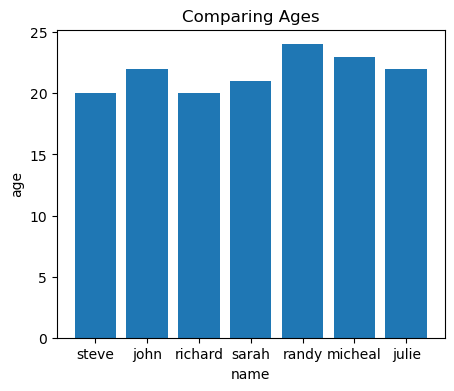

In [52]:
plt.bar (df['names'], df['age'])
plt.xlabel ('name')
plt.ylabel ('age')
plt.title ('Comparing Ages')

plt.show()

AttributeError: 'Axes' object has no attribute 'show'

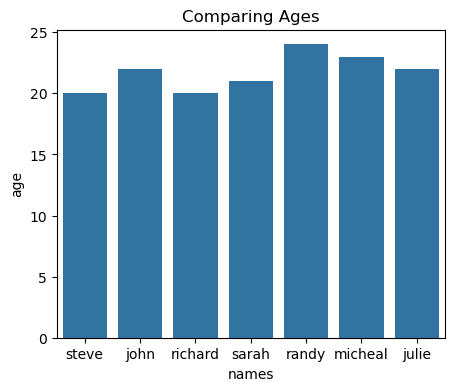

In [53]:
# use seaborn for bar chart
# it more efficiant and more beautiful

plot = sns.barplot (data=df, x = 'names', y = 'age')
plot.set_title ('Comparing Ages')

plot.show()

### Line Plot Matplotlib

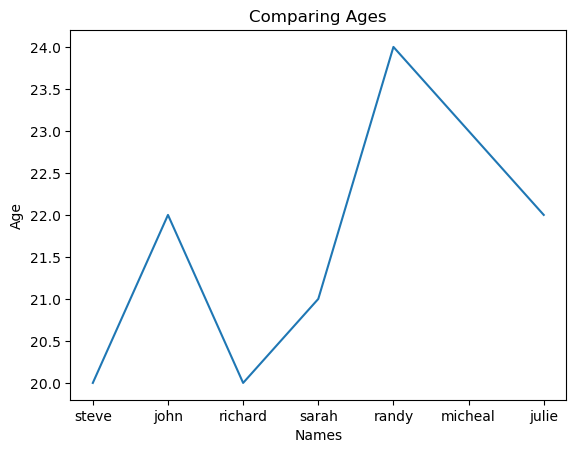

In [ ]:
plt.plot (df['names'], df['age'])
plt.xlabel ("Names")
plt.ylabel ("Age")
plt.title ('Comparing Ages')

plt.show()


### Line Plot Seaborn

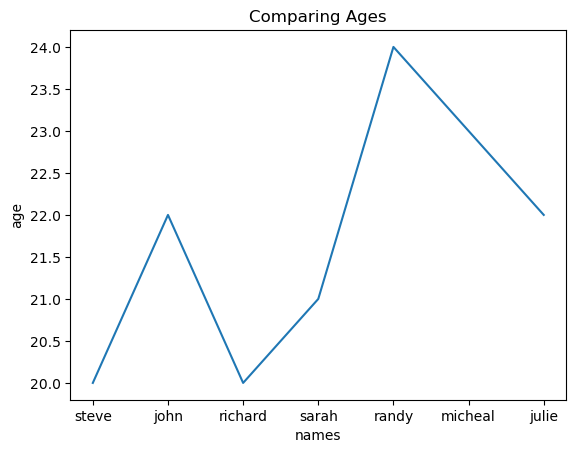

In [ ]:
plot = sns.lineplot (data=df, x='names', y='age')
plot.set_title ('Comparing Ages')

plt.show()

### Pie Chart Matplotlib

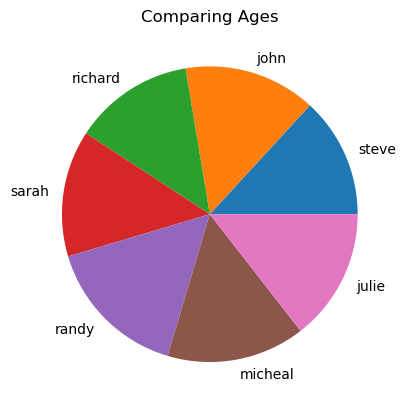

In [ ]:
plt.pie (df['age'], labels= df['names'])
plt.title ("Comparing Ages")

plt.show()

### Pie chart Seaborn

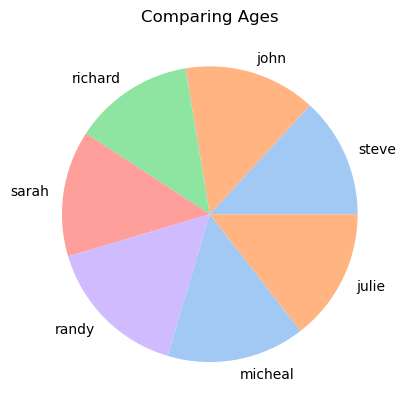

In [ ]:
# does not have pie chart but

colors = sns.color_palette ('pastel')[0:5]

# using Matplotlib 

plt.pie (df['age'], labels= df['names'], colors= colors)
plt.title ('Comparing Ages')

plt.show()

### Creating a line chart from a list object

In [ ]:
from numpy.random import randn

from matplotlib import rcParams

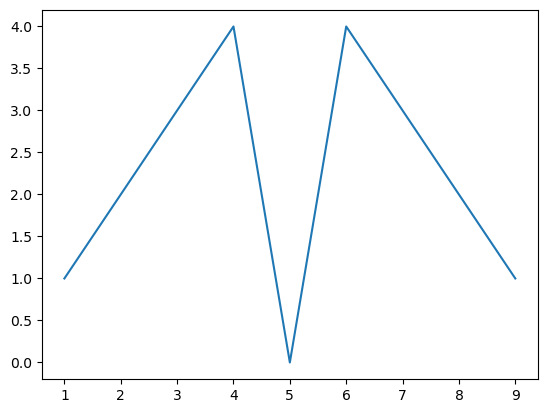

In [ ]:
x = range (1, 10)
y = [1, 2, 3, 4, 0, 4, 3, 2, 1]
plt.plot(x, y)

### Plotting a line chart in matplotlib

In [ ]:
address = '/home/micheal/Documents/GitHub/python-for-data-science-and-machine-learning-essential-training-part-1-3006708/data/mtcars.csv'

cars = pd.read_csv (address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt' , 'qsex' , 'vs' ,'am', 'gear' ,'carb']

mpg = cars['mpg'] # isolating mpg



<Axes: >

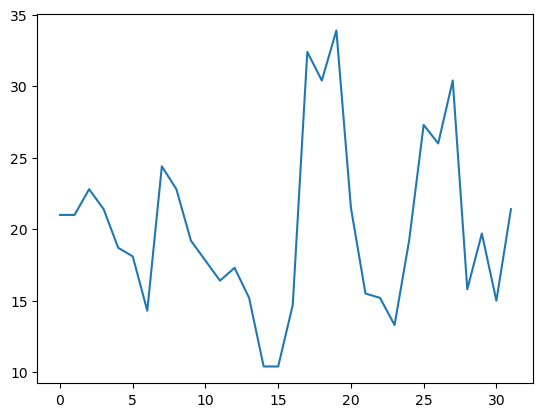

In [ ]:
mpg.plot()

<Axes: >

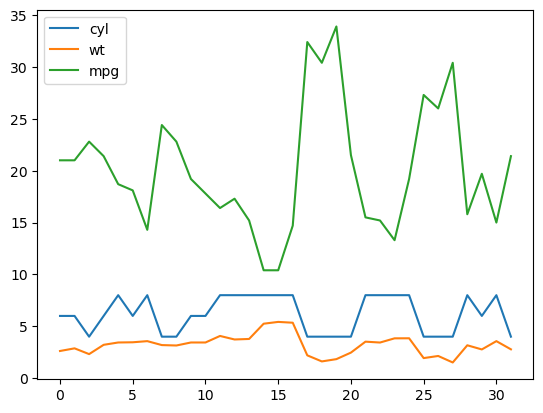

In [ ]:
df = cars [['cyl', 'wt', 'mpg']]
df.plot()

# Creating bar charts

### Creating a bar chart from a list

<BarContainer object of 9 artists>

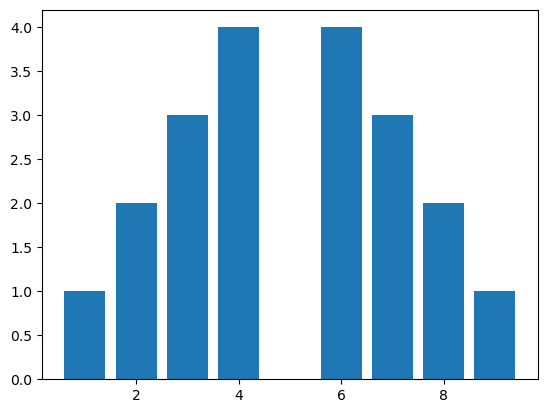

In [ ]:
plt.bar (x, y)

<Axes: >

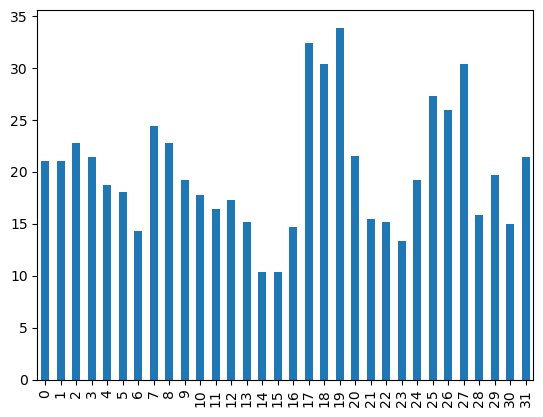

In [ ]:
mpg.plot(kind='bar')

<Axes: >

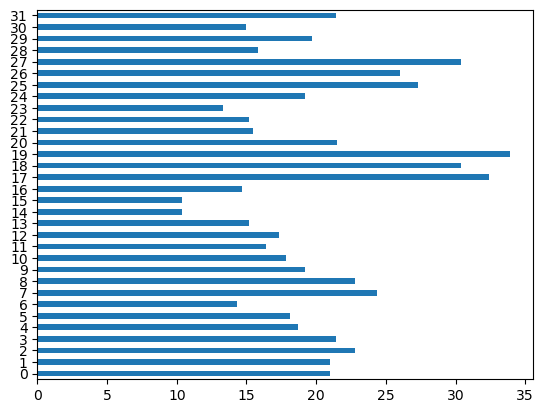

In [ ]:
mpg.plot(kind='barh')

# Ceating a pie chart


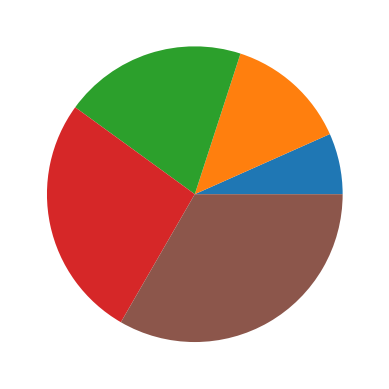

In [ ]:
x = [1,2,3,4,0,5]
plt.pie(x)

plt.show()

### Saving a plot

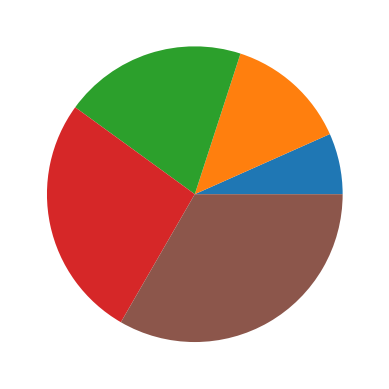

In [ ]:
plt.pie(x)

plt.savefig ('Pie_chart.png')

plt.show()

# Defining elements of a plot 

### Object-oriented method

In [54]:
# figure size and inline settings for your matplotlib plots 

%matplotlib inline
rcParams ['figure.figsize']=5,4 # inches


### Defining axes, ticks and grids

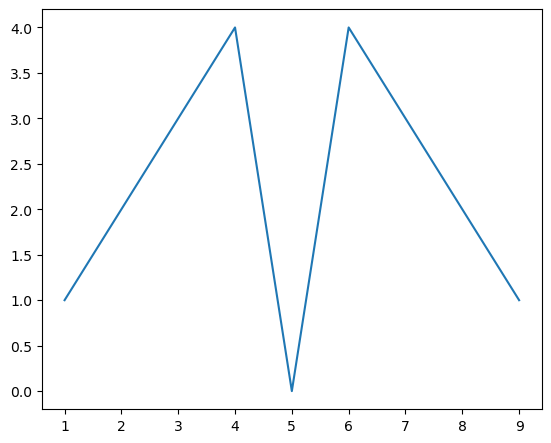

In [59]:
x = range (1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.plot(x, y)

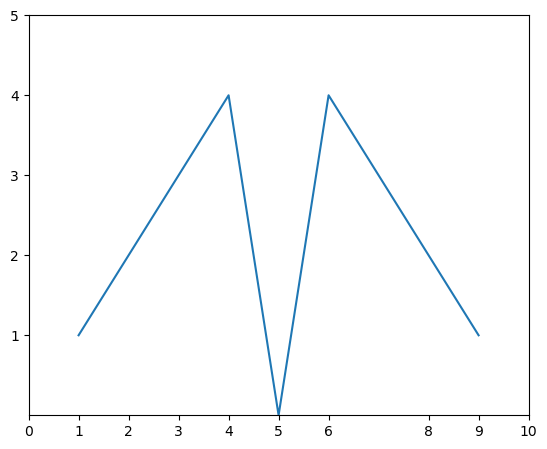

In [63]:
# limits and tick marks

x = range (1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim ([1,9])
ax.set_ylim ([0,5])

ax.set_xticks([0,1,2,3,4,5,6,8,9,10])
ax.set_yticks([1,2,3,4,5])

ax.plot(x, y)

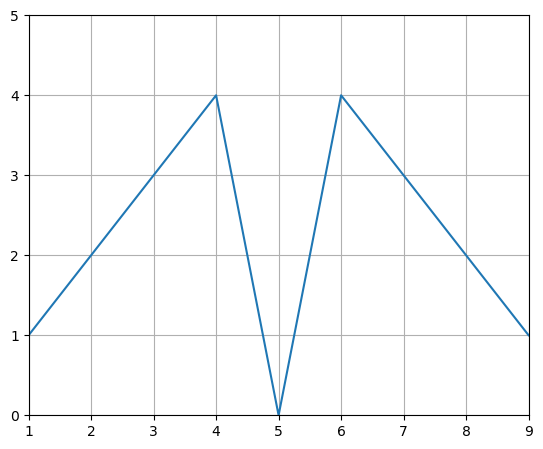

In [ ]:

x = range (1,10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim ([1,9])
ax.set_ylim ([0,5])

ax.grid()


ax.plot(x, y)

### Generating multiple plots in one figure with subplots

<Figure size 500x400 with 0 Axes>

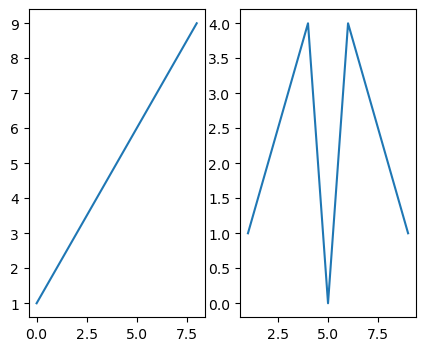

In [66]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x)
ax2.plot(x,y)